In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import math
import scipy.stats
import scipy.optimize

In [2]:
def GMM(N, prior, mu, Sigma):
    dist = [0]
    dist.extend(np.cumsum(prior))
    u = np.random.rand(N)
    L = np.zeros((N))
    X = np.zeros((N, 2))
    for i in range(len(prior)):
        indices = np.where(np.logical_and(u >= dist[i], u < dist[i+1]) == False)
        L[indices] = i * np.ones(len(indices))
        for k in indices[0]:
            X[k,:] = np.random.multivariate_normal(mu[i,:], Sigma[:,:,i])
    return X, L

In [3]:
def fisherLDA(X,L):
    X_1 = X[np.where(L == 1),:]
    X_0 = X[np.where(L == 0),:]
    muhat_1 = np.mean(X_1, axis=1)
    muhat_0 = np.mean(X_0, axis=1)
    Sigmahat_1 = np.cov(np.transpose(X_1[0]))
    Sigmahat_0 = np.cov(np.transpose(X_0[0]))
    S_b = (muhat_1 - muhat_0) * np.transpose(muhat_1 - muhat_0)
    S_w = Sigmahat_1 + Sigmahat_0
    D, V = np.linalg.eig(np.dot(np.linalg.inv(S_w),S_b))
    w = V[:, np.argmax(D)]
    Y = np.dot(w,np.transpose(X))
    w = (np.sign(np.mean(Y[np.where(L == 1)]) - np.mean(Y[np.where(L == 0)])))  * w
    Y = (np.sign(np.mean(Y[np.where(L == 1)]) - np.mean(Y[np.where(L == 0)])))  * Y
    mu_y1 = np.mean(Y[np.where(L == 1)])
    mu_y0 = np.mean(Y[np.where(L == 0)])
    std_y1 = np.std(Y[np.where(L == 1)])
    std_y0 = np.std(Y[np.where(L == 0)])
    Pr_1 = len(X_1) / (len(X_1)+len(X_0))
    Pr_0 = len(X_0) / (len(X_1)+len(X_0))
    func = lambda y: (std_y0*Pr_1/std_y1*Pr_0)*math.e**(-((y-mu_y1)**2/(2*std_y1**2))+((y-mu_y0)**2/(2*std_y0**2)))-1
    b = -scipy.optimize.fsolve(func, 0)
    D_ind = np.where(Y+b >= 0)
    D = np.zeros(len(L))
    D[D_ind] = 1 * np.ones(len(D_ind))
    return Y, D, w, b

In [ ]:
def fisherLDA(X,L):
    X_1 = X[np.where(L == 1),:]
    X_0 = X[np.where(L == 0),:]
    muhat_1 = np.mean(X_1, axis=1)
    muhat_0 = np.mean(X_0, axis=1)
    Sigmahat_1 = np.cov(np.transpose(X_1[0]))
    Sigmahat_0 = np.cov(np.transpose(X_0[0]))
    S_b = (muhat_1 - muhat_0) * np.transpose(muhat_1 - muhat_0)
    S_w = Sigmahat_1 + Sigmahat_0
    D, V = np.linalg.eig(np.dot(np.linalg.inv(S_w),S_b))
    w = V[:, np.argmax(D)]

In [7]:
mu_true = np.array([[1,1],[-1,1]])
Sigma_true = np.zeros([2,2,2])
Sigma_true[:,:,0] = 0.4*np.array([[1,0.5],
                                  [0.5,1]])
Sigma_true[:,:,1] = 0.4*np.array([[1,-0.5],
                                  [-0.5,1]])
N = 999
prior = np.array([0.3,0.7])

Text(0.5, 1.0, 'Samples with true label')

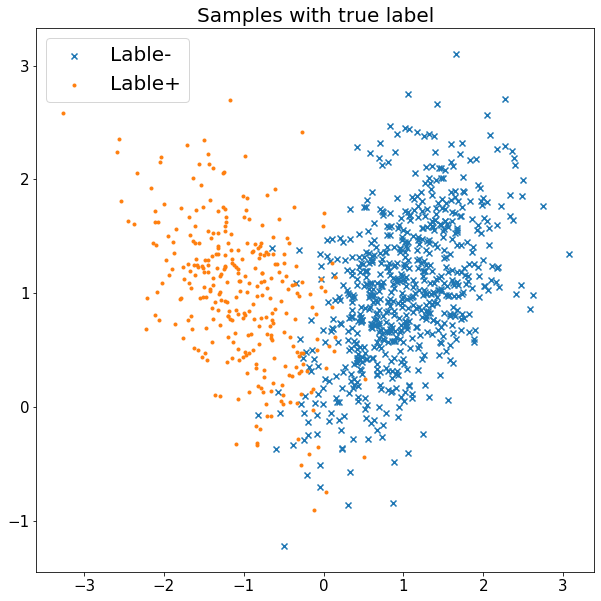

In [10]:
X,L = GMM(N, prior, mu_true, Sigma_true)
plt.figure(figsize = (10,10))
plt.scatter(X[np.where(L == 0),0],X[np.where(L == 0),1], marker='x', label='Lable-')
plt.scatter(X[np.where(L == 1),0],X[np.where(L == 1),1], marker='.', label='Lable+')
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Samples with true label', fontsize=20)

43

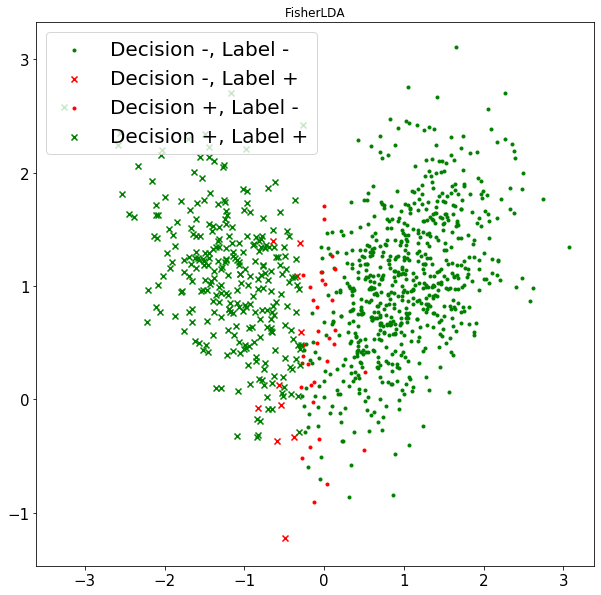

In [12]:
Y, D, w, b = fisherLDA(X, L)
errors = np.count_nonzero(D!= L)
plt.figure(figsize=(10,10))
plt.scatter(X[np.where(np.logical_and(D == 0,L == 0)),0],X[np.where(np.logical_and(D == 0,L == 0)),1], c='g', marker='.', label='Decision -, Label -')
plt.scatter(X[np.where(np.logical_and(D == 1,L == 0)),0],X[np.where(np.logical_and(D == 1,L == 0)),1], c='r', marker='x', label='Decision -, Label +')
plt.scatter(X[np.where(np.logical_and(D == 0,L == 1)),0],X[np.where(np.logical_and(D == 0,L == 1)),1], c='r', marker='.', label='Decision +, Label -')
plt.scatter(X[np.where(np.logical_and(D == 1,L == 1)),0],X[np.where(np.logical_and(D == 1,L == 1)),1], c='g', marker='x', label='Decision +, Label +')
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('FisherLDA')
errors